# MAE Optimization LAB

## March 2022

<div class="alert alert-danger">
Caution: execute the cells sequentially 
<div>

<div class="alert alert-block alert-warning">  Student Name:
    
    - First Name, Last Name:
    
    - First Name, Last Name:

# Lab1 - Introduction to numerical linear algebra
This document presents two exercises related to the use of the singular value decomposition (SVD) and the pseudo-inverse in two practical contexts. In particular, in this Lab,we will be interested to the following two applications:
1.  Image compression using SVD.
2.  Polynomial regression using experimental data.

## Exercise 1: Image compression using SVD
In this exercise we will see how the singular value decomposition can be used to “compress” a graphical figure by representing the figure as a matrix and then using the singular value decomposition to find the closest matrix of lower rank to the original. This approach can form the basis of efficient compression methods.

### Imports:

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy.linalg as npl

### Load, manipulate and display the image:

This NASA photo comes from the Hubble telescope and presents a dramatic picture of this extra-galactic formation.

![TarantulaNebula.jpg](TarantulaNebula.jpg)

In [ ]:
nasa = mpimg.imread("TarantulaNebula.jpg")
print(nasa)

<p class="bg-primary" style="padding:1em"> **Question 1):** Extract and comment the information relative to the nasa matrix: dimensions, min and max values of the elements,...</p> 

In [ ]:
print(nasa.ndim)
print(nasa.min())
print(nasa.max())

In [ ]:
plt.imshow(nasa) 
plt.show()

<div class="alert alert-block alert-warning">  Answer:
    

We can also transform the rgb image into a greyscale image.  To simplify this exercise, turn the nasa image into a greyscale with ordinary double precision values 0-255 using the following commands:

In [ ]:
#to sump up red+green+blue
img_greyscale= nasa[:,:,0] + nasa[:,:,1] + nasa[:,:,2]
#to find the max value
m = np.max(img_greyscale)



<p class="bg-primary" style="padding:1em"> **Question 2):** Display and comment the greyscale image using the python commands plt.imshow and plt.show </p> 

In [ ]:
plt.imshow(img_greyscale)
plt.show()

<div class="alert alert-block alert-warning"> Response: 
 </div>

### Perform SVD decomposition

#### SVD decomposition, the theorem

Let $M$ a matrix of shape $m*n$ whose coefficients belongs to $K$, where $K = \mathbb{R}$ or $K = \mathbb{C}$. Then there exists a factorisation of the form : $M = U \Sigma V^{*}$

With $U$ a unitary matrix of size $m*m$ on $K$, $\Sigma$ a $m*n$ matrix whose diagonal coefficients are positive or zero real numbers and all others are zero, and $V^{*}$ is the adjunct matrix of $V$, $n*n$ unitary matrix on $K$. We call this factorization: the singular value decomposition of $M$.

The $V$ matrix contains a set of orthonormal basis vectors of $K^n$, called « left-singular vectors ».

The $U$ matrix contains a set of orthonormal basis vectors of $K^n$, called « right-singular vectors ».

The $\Sigma$ matrix contains in its diagonal coefficients the singular values of the $M$ matrix, they correspond to the  roots of the eigenvalues of $M^*M$. The number of non-zero singular values is equal to the rank of $M$.

As a convention we order $\Sigma_{i,i}$ by decreasing order. Then, the $\Sigma$ matrix is uniquely determined by $M$ (but $U$ and $V$ aren't).

<p class="bg-primary" style="padding:1em"> **Question 3):** Using the Python command npl.svd, perform the SVD decomposition of the greyscale image by using the `svd` command from the numpy linear algrebra library. Check the dimensions of the decomposition outputs</p> 
See the documentation here: <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html" > https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html </a>

In [ ]:
#
# Apply the SVD to the img_greyscale 
#
U, s, Vt = np.linalg.svd(img_greyscale, full_matrices=True)

In [ ]:
print(U)
print(np.shape(U))

In [ ]:
print(s)
print(np.shape(s))

In [ ]:
print(Vt)
print(np.shape(Vt))

<div class="alert alert-block alert-warning"> Response:
    
 </div>

<p class="bg-primary" style="padding:1em"> **Question 4):** Plot the singular values on a semilog scale. Comment the obtained plot. </p>

In [ ]:
plt.semilogy(s,'*')

<div class="alert alert-block alert-warning"> Response:
 </div>

### Reconstruction of the image using some of the singular values:

<p class="bg-primary" style="padding:1em"> **Question 5):** The objective now is to reconstruct different images based matrices with lower rank as the initial nasa matrix. </p>

Compare three recomposed matrices

- using the 100 first elements
- using the 50 first elements
- using the 25 first elements

Plot the associated images and comment the obtained images.

In [ ]:
#First we will construct the S matrix from the s vector (which corresponds to the diagonal terms)
S = np.zeros(np.shape(img_greyscale))
print('size of the s vector ', min(np.shape(img_greyscale)))
S[:min(np.shape(img_greyscale)),:min(np.shape(img_greyscale))]=np.diag(s)
print( 'matrix S', S)

The first step is to check the decomposition 


In [ ]:
img_greyscale_recomposed = U.dot(S.dot(Vt))

In [ ]:
plt.imshow(img_greyscale_recomposed, cmap='gray')
plt.title('Reconstructed full SVD')
plt.show()


In [ ]:
nasa100 = #to complete
print(nasa100.shape)

In [ ]:
#to do for 50 elements
nasa50 = #to complete

In [ ]:
#to do for 25 elements
nasa25 = #to complete

In [ ]:
plt.imshow(nasa100, cmap='gray')
plt.title('Reconstructed SVD: nasa 100')
plt.show()

In [ ]:
plt.imshow(nasa50, cmap='gray')
plt.title('Reconstructed SVD: nasa 50')
plt.show()

In [ ]:
plt.imshow(nasa25, cmap='gray')
plt.title('Reconstructed SVD: nasa 25')
plt.show()

s_95_percent = s[:442]

<div class="alert alert-block alert-warning"> Response: 
    </div>

<p class="bg-primary" style="padding:1em"> **Question 6): Comment on the quality of the images versus the memory requirement.
Explain the importance of the SVD for image compression. </p>

<div class="alert alert-block alert-warning"> Response:

 </div>

We compare three recomposed matrices

- using  all the singumar values
- using half of the singular values
- using the singular values greater than  a threshold value 
- using the singular values to keep a % value of the total energy

Plot the associated images and comment the obtained images.

#### Using all singular values:

In [ ]:
# Construct the S matrix from the s vector.
S = np.zeros(np.shape(img_greyscale))
print(min(np.shape(img_greyscale)))
S[:min(np.shape(img_greyscale)),:min(np.shape(img_greyscale))]=np.diag(s)
print(S)
img_greyscale_rec = U.dot(S.dot(Vt))

Display the reconstructed greyscale image using all singular values:

In [ ]:
plt.imshow(img_greyscale_rec, cmap='gray')
plt.show()

#### Using half of the singular values:

In [ ]:
# Construct the S matrix from the s vector with half of the singular values
#to do

Display the reconstructed greyscale image using half of the singular values:

In [ ]:
plt.imshow(img_greyscale_rec, cmap='gray')
plt.show()

#### Using the singular values greater than 1 (thresholding):

In [ ]:
def vector_thresholding(s, threshold):
    for i in range(len(s)):
        if s[i]<threshold :
            return s[:i]
        if s[i]>threshold and i == len(s)-1:
            return s

s_thresholded = vector_thresholding(s, 1)

In [ ]:
# Construct the S matrix from the s vector susing the threshold function 
#to do


In [ ]:
plt.imshow(img_greyscale_rec, cmap='gray')
plt.show()

<p class="bg-primary" style="padding:1em"> **Question 7): Create a similar code to keep 95% of the energy (given by the trace of the $\Sigma$ matrix). How many terms are kept? </p>

In [ ]:
#write the code and plot the resulting image

<div class="alert alert-block alert-warning"> Response:

 </div>

## Exercise 2: Polynomial regression using experimental data

For this exercise, we will make use of `trajectory.data` file with data from the trajectory of Toulouse-Paris flight. Each row in the file has 4 informations related to the position $x$, $y$ and $z$ and the time $t$. The data in the file `trajectory.dat` can be extracted using Python. Once this instruction is executed, you will obtain a matrix with 4 columns.

Load the `trajectory.data` file:

In [3]:
f = open("trajectory.dat","r")
li = [ ln.split() for ln in f ]
f.close()
tableau = np.array(li)

trajectory=np.zeros(np.shape(tableau))
for i in range(np.shape(tableau)[0]):
    for j in range(np.shape(tableau)[1]):
        trajectory[i,j]=float(tableau[i,j])
        #print(type(float(tableau[i,j])))
        
print(trajectory)

[[ 1.12421956e+05 -3.76620868e+05  6.85800000e+02  0.00000000e+00]
 [ 1.09962500e+05 -3.85679000e+05  2.84988000e+03  1.78156999e+02]
 [ 1.07764176e+05 -3.83739956e+05  3.04800000e+03  2.00391000e+02]
 [ 1.02786000e+05 -3.54107956e+05  4.64820000e+03  3.65430000e+02]
 [ 1.02380412e+05 -3.51387368e+05  4.86156000e+03  3.79649000e+02]
 [ 1.00500632e+05 -3.17155000e+05  6.54558000e+03  5.43664000e+02]
 [ 1.00209868e+05 -3.12293500e+05  6.72084000e+03  5.66171999e+02]
 [ 9.82708240e+04 -2.77568500e+05  8.37438000e+03  7.22828000e+02]
 [ 9.80115440e+04 -2.72908868e+05  8.59536000e+03  7.45344000e+02]
 [ 9.61891760e+04 -2.39719176e+05  9.74598000e+03  9.00976999e+02]
 [ 9.59854560e+04 -2.35781824e+05  9.75360000e+03  9.19485000e+02]
 [ 9.39315880e+04 -1.98308456e+05  9.75360000e+03  1.08023500e+03]
 [ 9.36130440e+04 -1.93071000e+05  9.74598000e+03  1.10275000e+03]
 [ 9.26296320e+04 -1.73595368e+05  9.74598000e+03  1.18618800e+03]
 [ 9.16443680e+04 -1.56551412e+05  9.74598000e+03  1.25858600e

Here is an example where we plot the vertical profile of the flight  ($z$ coordinate) with respect to the time $t$.

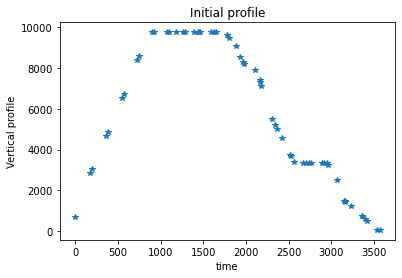

In [4]:
x = trajectory[:, 0]
y = trajectory[:, 1]
z = trajectory[:, 2]
t = trajectory[:, 3]

plt.plot(t, z, '*')
plt.xlabel('time')
plt.ylabel('Vertical profile')
plt.title('Initial profile')
plt.show()

Let $t= [t_1, t_2, ..., t_m] \in \mathbb{R}^m$ the vector time and $z = [z_1, z_2, ..., z_m] \in \mathbb{R}^m$ a vector of observations. We aim to find the equation of a linear model with the best fitting.

In this lab, we choose a polynomial model of the form $$z(t) = \Sigma_{j=1}^n p_j t^{j−1}$$

The  parameters $p = [p_1, p_2, ..., p_n] \in \mathbb{R}^n$ are  obtained  by  solving  the  following  least-squares problem $$\min_{p \in \mathbb{R}^n} \mid\mid Rp−z\mid\mid^2$$

where $R = \begin{bmatrix} 1 & t_1 & t_1^2 & ... & t_1^{n-1} \\ 1 & t_2 & t_2^2 & ... & t_2^{n-1} \\  \vdots &  \vdots &  \vdots &  \ddots &  \\ 1 & t_m & t_m^2 & ... & t_m^{n-1} \end{bmatrix} \in \mathbb{R}^{m×n}$.

The solution $p^* = [p^∗_1, p^∗_2, ..., p^∗_n]$ of such minimization problem is given by 
$$p^∗ = R^+ z$$ 
where $R^+$ is the pseudo-inverse of $R$. 

As a first test scenario, we choose $m = n = 6$.

In [5]:
m = 6
n = 6

In [6]:
#we extract m components for t and z
z = trajectory[:m, 2]
t = trajectory[:m, 3]

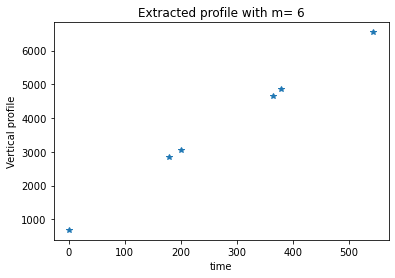

In [7]:
plt.plot(t, z, '*')
plt.xlabel('time')
plt.ylabel('Vertical profile')
plt.title('Extracted profile with m= %d' %m )
plt.show()

Build the $R$ matrix:

In [12]:
R = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        R[i,j] = t[i]**(j)
print(R)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.78156999e+02 3.17399163e+04 5.65468824e+06
  1.00742229e+09 1.79479331e+11]
 [1.00000000e+00 2.00391000e+02 4.01565529e+04 8.04701179e+06
  1.61254874e+09 3.23140254e+11]
 [1.00000000e+00 3.65430000e+02 1.33539085e+05 4.87991878e+07
  1.78326872e+10 6.51659888e+12]
 [1.00000000e+00 3.79649000e+02 1.44133363e+05 5.47200872e+07
  2.07744264e+10 7.88699020e+12]
 [1.00000000e+00 5.43664000e+02 2.95570545e+05 1.60691065e+08
  8.73619470e+10 4.74955456e+13]]


Compute $R^+$ the pseudo-inverse of $R$ using the `pinv` command from the numpy linear algrebra library and deduce the solution $p^*$:

In [9]:
Rpinv = npl.pinv(R)
p_with_pinv = Rpinv.dot(z)
print('p*=', p_with_pinv)

p*= [ 6.85794887e+02  5.67102006e+00  1.37550336e-01 -9.04412893e-04
  2.20884304e-06 -1.80052646e-09]


<div class="alert alert-block alert-warning">
Actually we $\textbf{never}$ compute the inverse or the pseudo inverse to find the solution. Indeed, it can really be computationnaly expensive. In practice we prefer to solve a linear system. 

To determine the linear system that we have to solve, we compute the gradient of the objective and we write the equation "gradient of the objective equals 0" . In the case of a linear least squares problem of the form 
    $$min_{p \in \mathbb{R}^n} \mid\mid Rp−z\mid\mid^2$$ 
    that methodology leads to the so called $\textbf{normal equations}$: $$R^t R p = R^t z$$ where 

Python allows us to solve a linear system using the "numpy.linalg.solve()" function.
    </div>

In [10]:
Rt=np.transpose(R)
p_linear_syst = npl.solve(Rt.dot(R), Rt.dot(z))
print('p* with linear system',p_linear_syst)

p* with linear system [ 6.85800000e+02  5.67018854e+00  1.37561178e-01 -9.04460536e-04
  2.20893038e-06 -1.80058280e-09]


Compute the error between the 2 solutions:

In [11]:
error = npl.norm(p_with_pinv - p_linear_syst, 2) 
print('error due to the inverse method', error)

error due to the inverse method 0.005180374962636902


We will now try to plot the reconstructed trajectory based on the chosen parameters ($m$ and $n$) 

First, we need to discretize the new space defined by the $m$ extracted points. $q$ points uniformly distributed between $t(0)$ and $t(m-1)$ will be defined.

Let $q=200$ and let $$\tilde{t} =[\tilde{t_1}, \tilde{t_2}, ..., \tilde{t_q}] $$ 
where $\tilde{t_i} = t_1 + \frac{(i-1)(t_m -t_1)}{q-1}$.



In [13]:
#Compute $\tilde{t}$.
q=200
t_tilde = np.linspace(t[0], t[m-1], q)


Then we need to compute the $\tilde z$ associated to the $\tilde t$

Compute $\tilde z = z(\tilde{t_i}) \forall i \in {1,...q}$ using the parameters of the polynomial approximation computed above

In [14]:
#first compute R_tilde:
R_tilde = np.zeros((q,n))
for i in range(q):
    for j in range(n):
        R_tilde[i,j] = t_tilde[i]**j
    
# use the polynomial approximation to compute z_tilde :
z_tilde = R_tilde.dot(p_with_pinv)


Display on the same figure the two curves: 
- $z$ with respect to $t$ 
- $\tilde z $ with respect to $\tilde t$.

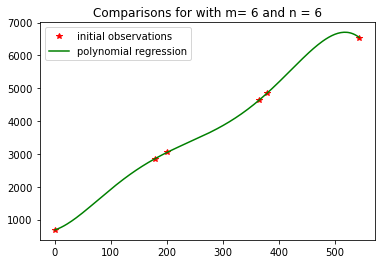

In [15]:
plt.figure()
plt.plot(t, z, '*',color='r', label='initial observations')
plt.plot(t_tilde, z_tilde, color='g', label='polynomial regression')
plt.title('Comparisons for with m= %d and n = %d' % (m, n))
plt.legend()
plt.show()

error due to the inverse method 657.3132513048852


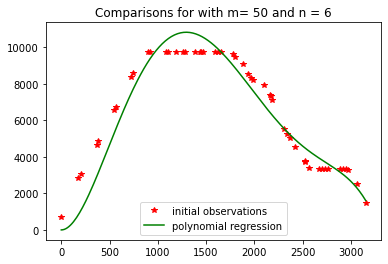

error due to the inverse method 382.21223569145855


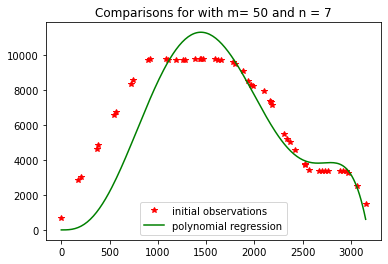

error due to the inverse method 988.8691471229027


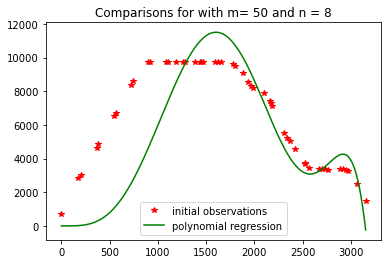

error due to the inverse method 770.3221362503922


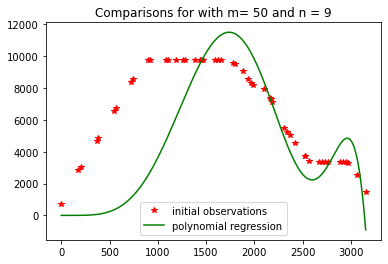

error due to the inverse method 666.5883094462077


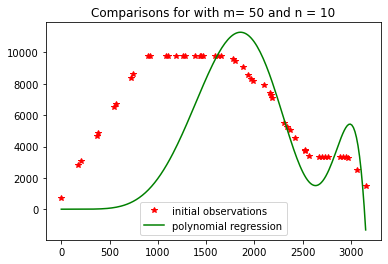

In [19]:
list_MN = [(50,6),(50,7), (50,8), (50,9), (50,10)]
for m,n in list_MN:
    z = trajectory[:m, 2]
    t = trajectory[:m, 3]
    R = np.zeros((m,n))

    for i in range(m):
        for j in range(n):
            R[i,j] = t[i]**j

    Rpinv = npl.pinv(R)
    p_with_pinv = Rpinv.dot(z)
    Rt=np.transpose(R)
    p_linear_syst = npl.solve(Rt.dot(R), Rt.dot(z))
    error = npl.norm(p_with_pinv - p_linear_syst, 2)
    print('error due to the inverse method', error)
    q=200
    t_tilde = np.linspace(t[0], t[m-1], q)
    R_tilde = np.zeros((q,n))
    for i in range(q):
        for j in range(n):
            R_tilde[i,j] = t_tilde[i]**j
    
# use the polynomial approximation to compute z_tilde :
    z_tilde = R_tilde.dot(p_with_pinv)
    plt.figure()
    plt.plot(t, z, '*',color='r', label='initial observations')
    plt.plot(t_tilde, z_tilde, color='g', label='polynomial regression')
    plt.title('Comparisons for with m= %d and n = %d' % (m, n))
    plt.legend()
    plt.show()

<p class="bg-primary" style="padding:1em"> **Question 8):** Try different values for $m$ and $n$. Comment the obtained results using the following cases:
    
a) $m=10$, $n=6$

b) $m=20$, $n=6$

c) $m=50$, $n=6$

d) $m=50$, $n=10$
</p>

<div class="alert alert-block alert-warning"> Response:
 </div>

<p class="bg-primary" style="padding:1em"> **Question 9):** Deduce some drawbacks for the polynomial models of the form 
   $$z(t) = \Sigma_{j=1}^n p_j t^{j−1}$$ </p>

<div class="alert alert-block alert-warning"> Response:

 </div>

<p class="bg-primary" style="padding:1em"> **Qestion 10):** Normalize data such that $t \in [0,1]$ and  $z \in [0,1]$ 
Does it change the drawbacks that you obtained in question 9? 
    
Comment for: 
- e) $m=50$, $n=10$
- f) $m=50$, $n=25$
</p>

<div class="alert alert-block alert-warning"> Response:

 </div>